<h1 align="center"> Практична робота № 6 </h1>
<h2 align="center"> <b> Оцінки розподілу даних </b> </h2>
<hr> <h3 align="center">Виконав студент групи ФБ-35 Куб'юк Дмитро </h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("winequality.csv")
df = df.drop(columns="type")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
1,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
2,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
3,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5
4,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5


Зробити коробчасту діаграму, скрипковий графік, гістограму, графік густини, контурний графік. Для будь-яких атрибутів.

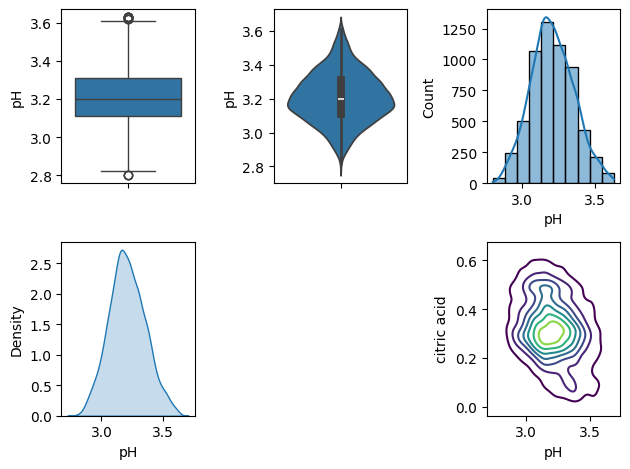

In [3]:
x_attr = "pH"
y_attr = "citric acid"

plt.subplot(2,3,1)
sns.boxplot(df[x_attr])

plt.subplot(2,3,2)
sns.violinplot(df[x_attr])

plt.subplot(2,3,3)
sns.histplot(df[x_attr], bins=10, edgecolor="black", kde=True)

plt.subplot(2,3,4)
sns.kdeplot(df[x_attr], fill=True)

plt.subplot(2,3,6)
sns.kdeplot(x=df[x_attr], y=df[y_attr], levels=8, fill=False, cmap="viridis")

plt.tight_layout()
plt.show()

Побудувати коефіцієнти кореляцій для 2 атрибутів. побудувати кореляційну матицю.

Pearson(alcohol,quality) = 0.4450, p=9.722e-287
Spearman(alcohol,quality) = 0.4463, p=1.211e-288


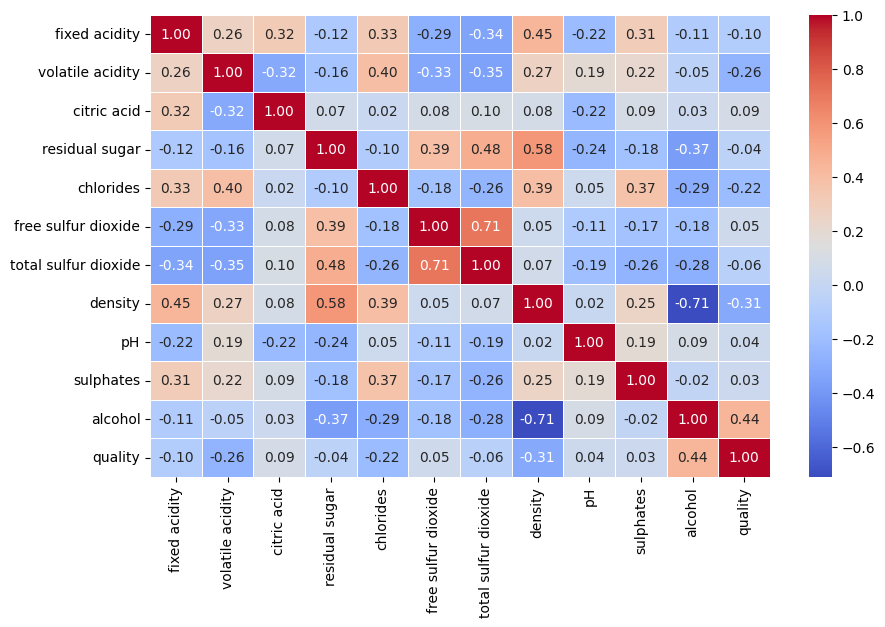

In [4]:
a, b = "alcohol", "quality"

pearson_corr, pearson_p = pearsonr(df[a], df[b])
spearman_corr, spearman_p = spearmanr(df[a], df[b])

print(f"Pearson({a},{b}) = {pearson_corr:.4f}, p={pearson_p:.3e}")
print(f"Spearman({a},{b}) = {spearman_corr:.4f}, p={spearman_p:.3e}")

corr = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.show()

За допомогою методу головних компонент визначити основні компоненти та залежні від них. Спропувати інтерпретувати нові атрибути.

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print("Відсоток поясненої дисперсії кожною компонентою:", pca.explained_variance_ratio_)

result = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=df.columns)

print("Вплив змінних на компоненти:")
result.head()

Відсоток поясненої дисперсії кожною компонентою: [0.24412405 0.22470037]
Вплив змінних на компоненти:


,PC1,PC2
fixed acidity,-0.346442,0.160299
volatile acidity,-0.393503,0.056326
citric acid,0.052112,0.085876
residual sugar,0.247743,0.410501
chlorides,-0.370294,0.209337


Перша головна компонента (PC1) має найбільший вплив від показників кислотності та вмісту хлоридів, усі з негативними коефіцієнтами. Це означає, що зі зростанням кислотності та хлоридів значення PC1 зменшується. Отже, PC1 можна інтерпретувати як показник "чистоти смаку", де вищі значення відповідають винам із нижчою кислотністю.

Друга головна компонента (PC2) найбільше залежить від залишкового цукру та частково від хлоридів, які мають позитивний внесок. Відповідно, PC2 відображає "солодкість вина" - чим більший залишковий цукор, тим вищим буде значення цієї компоненти.

Розрахувати моду та стандартну похибку.

In [6]:
mode_values = df.mode().iloc[0]
print(f"Мода для кожного атрибуту:\n{mode_values}")

se = np.std(df, ddof=1) / np.sqrt(np.size(df))
print(f"\nСтандартна похибка для кожного атрибуту:\n{se}")

Мода для кожного атрибуту:
fixed acidity             6.800
volatile acidity          0.280
citric acid               0.300
residual sugar            2.000
chlorides                 0.036
free sulfur dioxide      29.000
total sulfur dioxide    111.000
density                   0.992
pH                        3.140
sulphates                 0.500
alcohol                   9.500
quality                   6.000
Name: 0, dtype: float64

Стандартна похибка для кожного атрибуту:
fixed acidity           0.004619
volatile acidity        0.000562
citric acid             0.000413
residual sugar          0.017929
chlorides               0.000117
free sulfur dioxide     0.065886
total sulfur dioxide    0.204912
density                 0.000011
pH                      0.000553
sulphates               0.000549
alcohol                 0.004444
quality                 0.003269
dtype: float64


c:\Users\someone\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:4062: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Оцінити на який розподіл схожий розподіл ваших даних, виходячи з вигляду основних розділів з теорії ймовірності.


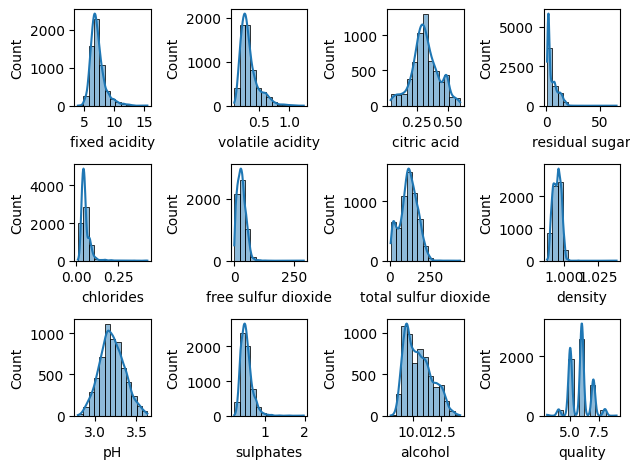

In [7]:
cols = df.columns

for i, c in enumerate(cols, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[c], kde=True, bins=13)

plt.tight_layout()
plt.show()

Більшість показників мають нормальний (гаусівський) розподіл, тоді як для параметра residual sugar більш характерний показниковий (експоненційний) розподіл.

Зробити бутстрап вибірку для 1000 значень та обрахувати довірчий інтервал.

In [ ]:
data = df['alcohol']
n_boot = 1000
boot_means = []

for _ in range(n_boot):
    sample = np.random.choice(data, size=len(data), replace=True)
    boot_means.append(np.mean(sample))

ci_lower = np.percentile(boot_means, 2.5)
ci_upper = np.percentile(boot_means, 97.5)

print(f"Довірчий інтервал для alcohol: [{ci_lower:.3f}, {ci_upper:.3f}]")

Довірчий інтервал для alcohol: [10.472, 10.533]
